#6430250440 อิทธิเดช กระจ่าง

#Pre process

In [ ]:
import numpy as np
import pandas as pd
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib.pyplot import figure

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_session/wine500.csv')
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecci√≥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La B√©gude, named af...",La Br√ªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la B√©gude


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...,...
480,480,US,Made from what Californians call the Pommard c...,Charles Vineyard Clone O5,89,49.0,California,Anderson Valley,Mendocino/Lake Counties,Pinot Noir,Foursight
489,489,US,"Bloody meats, dried cherries, pressed purple f...",Cheval Rouge Reserve,89,30.0,California,Carmel Valley,Central Coast,Bordeaux-style Red Blend,Bo√´t√©
492,492,US,The estate reserve gets more new and once-fill...,Nicholas Estate Reserve,89,46.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Anam Cara
494,494,US,Warm berry-rhubarb pie notes mix with black pe...,Fourplay,89,43.0,California,Santa Ynez Valley,Central Coast,Red Blend,Carhartt Vineyard


In [ ]:
df["winery_price"] = df["winery"] + " " + df['price'].astype(str)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,winery_price
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,Heitz 235.0
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,Macauley 90.0
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,Ponzi 65.0
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergstr√∂m,Bergstr√∂m 65.0
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,Blue Farm 60.0
...,...,...,...,...,...,...,...,...,...,...,...,...
480,480,US,Made from what Californians call the Pommard c...,Charles Vineyard Clone O5,89,49.0,California,Anderson Valley,Mendocino/Lake Counties,Pinot Noir,Foursight,Foursight 49.0
489,489,US,"Bloody meats, dried cherries, pressed purple f...",Cheval Rouge Reserve,89,30.0,California,Carmel Valley,Central Coast,Bordeaux-style Red Blend,Bo√´t√©,Bo√´t√© 30.0
492,492,US,The estate reserve gets more new and once-fill...,Nicholas Estate Reserve,89,46.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Anam Cara,Anam Cara 46.0
494,494,US,Warm berry-rhubarb pie notes mix with black pe...,Fourplay,89,43.0,California,Santa Ynez Valley,Central Coast,Red Blend,Carhartt Vineyard,Carhartt Vineyard 43.0


In [ ]:
df.isnull()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,winery_price
0,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
480,False,False,False,False,False,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,False,False
492,False,False,False,False,False,False,False,False,False,False,False,False
494,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# For each row, combine all the columns into one column
# # corpus = df[['description','winery_price']].apply(lambda x: ' '.join(x.astype(str)), axis=1)
# corpus = df['description']
# corpus.head()

In [ ]:
# spit_corpus = [row.split(' ') for row in corpus]
sent = [[df["winery_price"].reset_index(drop=True).iloc[i]] for i in range(len(df["winery_price"]))]
sent[0:5]



[['Heitz 235.0'],
 ['Macauley 90.0'],
 ['Ponzi 65.0'],
 ['Bergstr√∂m 65.0'],
 ['Blue Farm 60.0']]

In [ ]:
model = Word2Vec(sent, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
print(model)

Word2Vec<vocab=161, vector_size=100, alpha=0.025>


#Plot PCA ของ Wine ทุกชนิด

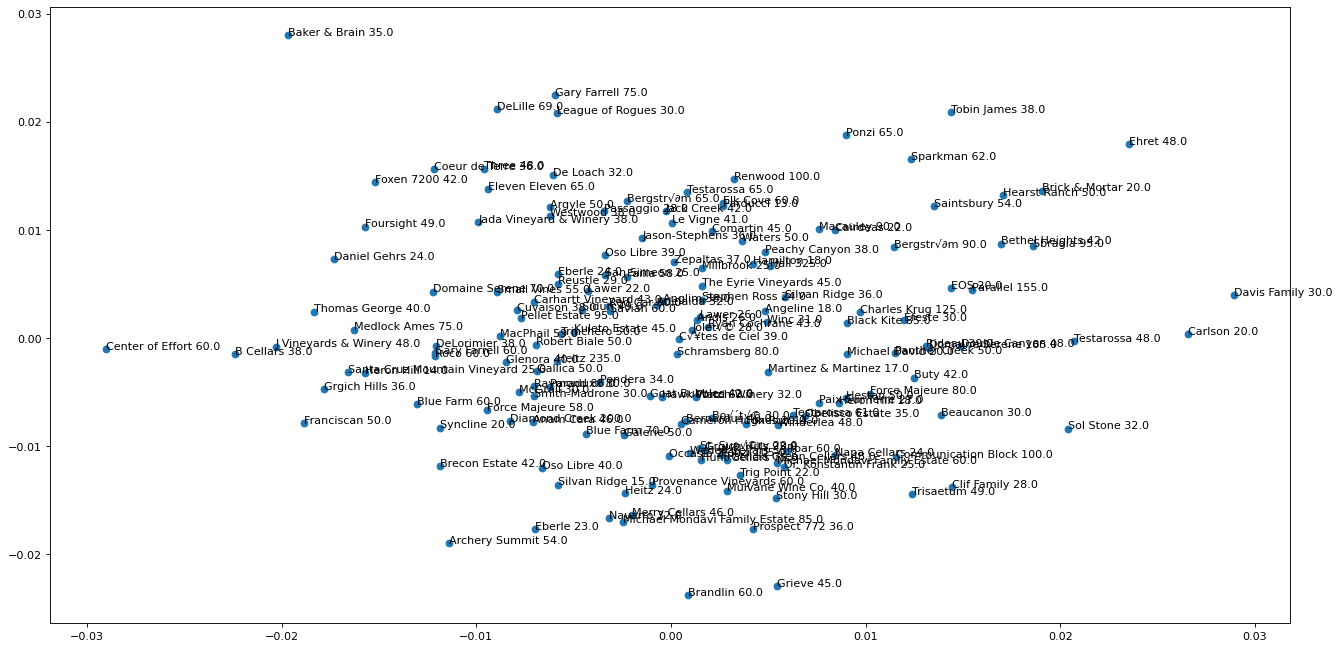

In [ ]:
words = list(model.wv.key_to_index)
X = [model.wv[word] for i, word in enumerate(words)]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
figure(figsize = (20, 10), dpi = 80)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
	  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#Plot PCA ของ Wine 5 ชนิด

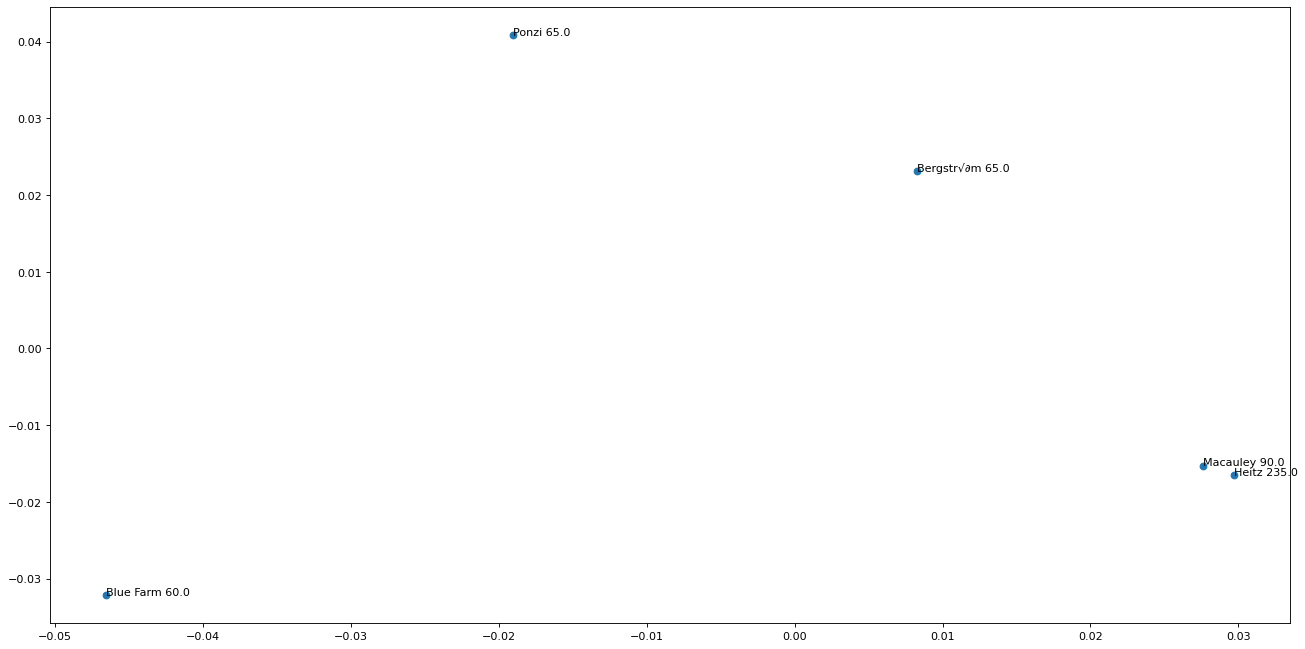

In [ ]:
words = np.concatenate(sent[:5]).tolist()
X = [model.wv[word] for i, word in enumerate(words)]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
figure(figsize = (20, 10), dpi = 80)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
	  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()